In [1]:
# Computation Timer
from timeit import default_timer as trec

# Data Mining
import pandas as pd
import numpy as np
from sklearn import decomposition
from scipy.spatial.distance import cdist, pdist
from scipy import sparse as sp ## Sparse Matrix
from sklearn.cluster import KMeans, MiniBatchKMeans # Add MiniBatchKMeans

# Visualization
from IPython.display import display # Display HTML Table
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
start = trec()

## Import Data
alldata = pd.read_csv("../../data/alldata_traincode_170510.csv", encoding='CP932')
allWrdMat10 = pd.read_csv("../../data/allWrdMat10.csv.gz", encoding='CP932')

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 291.296 seconds


In [3]:
start = trec() 

## Set X as CSR Sparse Matrix (Row Extraction is Faster) 
X = np.array(allWrdMat10)
X = sp.csr_matrix(X)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 45.782 seconds


In [4]:
start = trec() 

## K Means from Whole Data
## Using the elbow nethod to determine the number of clusters
cluster = range(1, 16)
score = []
for a in cluster:
    kmeans = KMeans(n_clusters=a, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
    ks = -(kmeans.fit(X).score(X))
    score.append(ks)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 6147.517 seconds


Since we intentionally to let the machine decide how many clusters, we utilize the scree plot, which is constructed baed on the score and the number of clusters, to see the poential number of clusters we should consider.

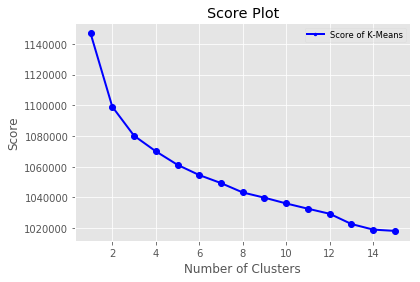

In [5]:
## Plotting the result
plt.plot(cluster, score, 'bo-', linewidth=2)
plt.title('Score Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
leg = plt.legend(['Score of K-Means'], loc='best', borderpad=0.3,
                 shadow=False, prop=mpl.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

According to the scree plot, it shows that the "**elbow**" point is **3**. However, to prevent the biasness, in addtition to **three** clusters, we also let the machine learn the cases of **four** clusters and **five** clusters. The results are shown below.

In [6]:
start = trec() 

kmeans3 = KMeans(n_clusters=3, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult3 = kmeans3.fit(X)
kmlabels3 = kmresult3.predict(X)
words = allWrdMat10.columns

print("Top 20 terms per cluster:")
order_centroids3 = kmresult3.cluster_centers_.argsort()[:, ::-1]

for a in range(3):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids3[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult3.cluster_centers_[a,b])
    comptable = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable = comptable.transpose()
    display(comptable)
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Top 20 terms per cluster:
Cluster 0:


,０,１,２,円,５,３,人,万,億,４,年,６,８,７,９,日,％,年度,兆,社
20 highest component,2.549,0.649,0.545,0.432,0.298,0.289,0.278,0.272,0.244,0.217,0.212,0.183,0.165,0.154,0.148,0.088,0.076,0.075,0.061,0.059


Cluster 1:


,米,首相,氏,２,３,日,５,４,政府,人,日本,自民,６,大統領,０,化,案,方針,選,会談
20 highest component,0.103,0.083,0.083,0.082,0.077,0.074,0.055,0.055,0.052,0.047,0.042,0.041,0.041,0.041,0.04,0.039,0.038,0.036,0.036,0.035


Cluster 2:


,１,２,５,３,０,円,４,人,日,％,６,９,年,７,８,．,億,万,調査,連載
20 highest component,1.035,0.412,0.291,0.288,0.28,0.242,0.232,0.21,0.201,0.19,0.183,0.177,0.175,0.167,0.153,0.094,0.093,0.085,0.084,0.07


Computation time is 250.943 seconds


In [7]:
start = trec() 

kmlabels3 = pd.DataFrame(kmlabels3)

allWrdMat10_3 = kmlabels3.join(allWrdMat10)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 14.783 seconds


In [8]:
start = trec() 

kmlabels3.to_csv('../../data/kmlabels3.csv')

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 0.553 seconds


In [9]:
start = trec() 

kmeans4 = KMeans(n_clusters=4, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult4 = kmeans4.fit(X)
kmlabels4 = kmresult4.predict(X)
words = allWrdMat10.columns

print("Top 20 terms per cluster:")
order_centroids4 = kmresult4.cluster_centers_.argsort()[:, ::-1]

for a in range(4):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids4[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult4.cluster_centers_[a,b])
    comptable = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable = comptable.transpose()
    display(comptable)
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Top 20 terms per cluster:
Cluster 0:


,米,首相,氏,３,日,５,４,政府,大統領,自民,日本,人,６,化,案,方針,会談,選,０,者
20 highest component,0.106,0.085,0.085,0.077,0.063,0.055,0.054,0.053,0.042,0.042,0.041,0.041,0.04,0.039,0.038,0.037,0.036,0.036,0.036,0.035


Cluster 1:


,１,円,０,３,５,日,４,人,９,年,６,７,８,２,％,億,万,連載,米,．
20 highest component,1.275,0.274,0.259,0.244,0.231,0.204,0.19,0.181,0.161,0.155,0.155,0.144,0.135,0.115,0.108,0.094,0.078,0.078,0.07,0.06


Cluster 2:


,２,１,５,３,０,日,％,人,４,年,６,７,９,８,調査,円,．,連載,米,万
20 highest component,1.098,0.241,0.231,0.218,0.21,0.205,0.198,0.191,0.189,0.155,0.143,0.129,0.128,0.11,0.089,0.085,0.085,0.071,0.069,0.06


Cluster 3:


,０,１,２,円,５,３,人,万,億,４,年,６,８,７,９,日,年度,％,兆,社
20 highest component,2.55,0.64,0.536,0.435,0.3,0.291,0.278,0.274,0.247,0.218,0.211,0.184,0.167,0.155,0.148,0.087,0.075,0.075,0.062,0.059


Computation time is 364.010 seconds


In [10]:
start = trec()

kmlabels4 = pd.DataFrame(kmlabels4)

kmlabels4.to_csv('../../data/kmlabels4.csv')


time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 0.320 seconds


In [11]:
start = trec() 

kmeans5 = KMeans(n_clusters=5, random_state=0, n_jobs=-1, n_init=10, max_iter=250)
kmresult5 = kmeans5.fit(X)
kmlabels5 = kmresult5.predict(X)
words = allWrdMat10.columns

print("Top 20 terms per cluster:")
order_centroids5 = kmresult5.cluster_centers_.argsort()[:, ::-1]

for a in range(5):
    print("Cluster %d:" % a)
    high20 = []
    cent20 = []
    for b in order_centroids5[a, :20]:
        high20.append(words[b])
        cent20.append(kmresult5.cluster_centers_[a,b])
    comptable = pd.DataFrame(index = high20, columns = ['20 highest component'], data = np.round(cent20,3))
    comptable = comptable.transpose()
    display(comptable)
    
time = trec() - start
print('Computation time is %0.3f seconds' % time)

Top 20 terms per cluster:
Cluster 0:


,氏,首相,３,５,４,政府,自民,人,日,６,化,案,日本,方針,選,調査,０,者,東京,きょう
20 highest component,0.09,0.087,0.08,0.057,0.056,0.052,0.046,0.043,0.043,0.041,0.04,0.039,0.039,0.039,0.038,0.037,0.037,0.036,0.036,0.035


Cluster 1:


,１,円,０,３,５,４,日,人,９,６,年,７,８,２,％,億,万,連載,．,調査
20 highest component,1.282,0.28,0.262,0.248,0.236,0.194,0.194,0.185,0.164,0.158,0.156,0.147,0.138,0.118,0.111,0.097,0.08,0.078,0.062,0.058


Cluster 2:


,２,１,５,３,０,人,％,日,４,年,６,９,７,８,調査,円,．,連載,万,億
20 highest component,1.112,0.247,0.231,0.217,0.212,0.196,0.195,0.192,0.189,0.153,0.144,0.128,0.128,0.108,0.09,0.088,0.083,0.071,0.061,0.048


Cluster 3:


,０,１,２,円,５,３,人,万,億,４,年,６,８,７,９,日,％,年度,兆,社
20 highest component,2.551,0.64,0.536,0.435,0.3,0.291,0.278,0.274,0.247,0.218,0.211,0.184,0.166,0.155,0.147,0.087,0.075,0.075,0.062,0.059


Cluster 4:


,米,日,大統領,会談,軍,協議,首脳,イラク,日本,首相,合意,北朝鮮,対,３,核,長官,政府,５,中,ブッシュ
20 highest component,1.106,0.285,0.153,0.134,0.113,0.1,0.092,0.084,0.067,0.067,0.066,0.065,0.064,0.063,0.062,0.06,0.055,0.052,0.051,0.05


Computation time is 441.897 seconds


In [12]:
start = trec()

kmlabels5 = pd.DataFrame(kmlabels5)

kmlabels5.to_csv('../../data/kmlabels5.csv')


time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 0.246 seconds


By the results, overall, we find that most influential words/terms are **numbers**, **units**, and several **neutral political terms**. Although none of the results show that we can divide headlines into **positive** and **negative** news just by unsupervised learning, the results of **k-means** are still very heuritic for the future study. One of the most important contribution is that, we find that we can just **delete** these words/terms and use the rest of the training set to further train the machine and further see what clusters we will get.

In [13]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])
    
    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    
    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [14]:
from matplotlib.font_manager import FontProperties
from sklearn.cluster import AgglomerativeClustering as hicluster

%matplotlib inline


dict_index = {t:i for i,t in enumerate(allWrdMat10.columns)}

dictlist = []
temp = []
akey = []
avalue = []

for key, value in dict_index.items():
    akey.append(key)
    avalue.append(value)
    temp = [key,value]
    dictlist.append(temp)

In [15]:
avalue = np.array(avalue)

X_transform = X[:, avalue < 1000].transpose().toarray()

freq1000terms = akey
freq1000terms = np.array(freq1000terms)[avalue < 1000]

In [16]:
start = trec() 
hicl_ward = hicluster(n_clusters=40,linkage='ward', compute_full_tree = False)
hicl_comp = hicluster(n_clusters=40,linkage='complete', compute_full_tree = False)
hicl_avg = hicluster(n_clusters=40,linkage='average', compute_full_tree = False)

hiclwres = hicl_ward.fit(X_transform)
hiclcres = hicl_comp.fit(X_transform)
hiclares = hicl_avg.fit(X_transform)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 175.741 seconds


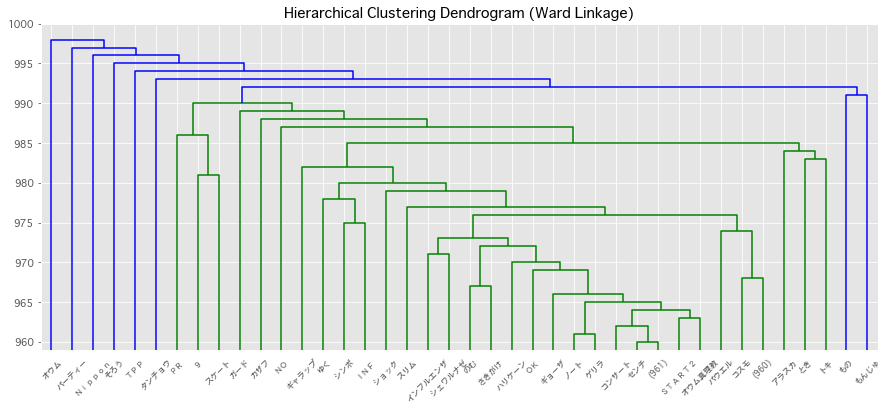

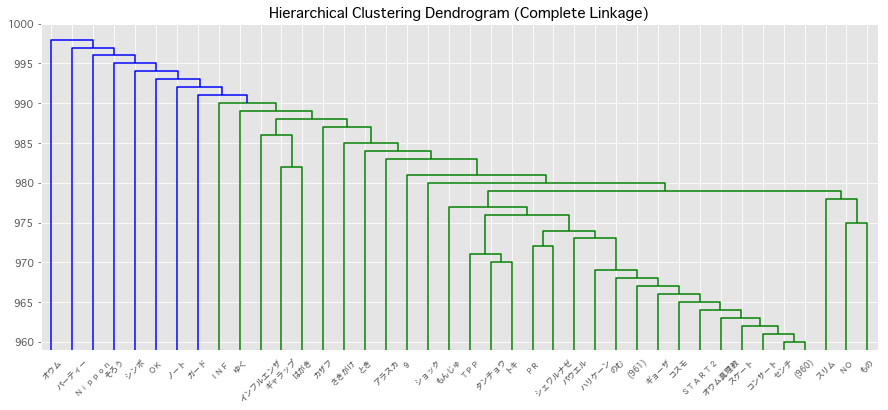

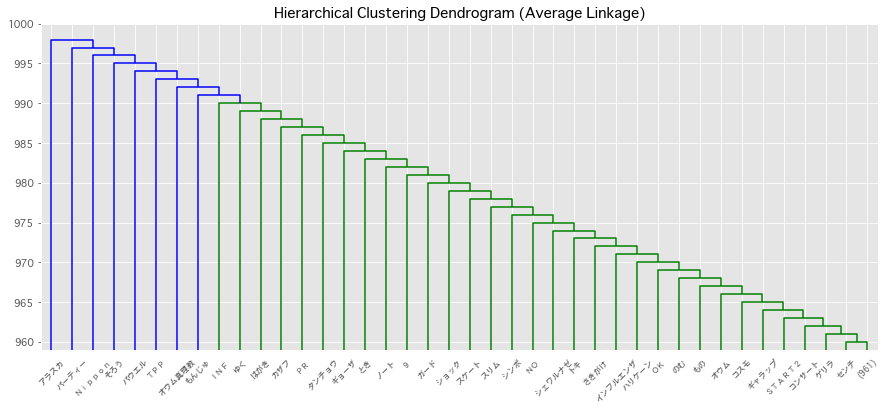

In [17]:
plt.rcParams["font.family"] ="Osaka"
plt.rcParams["figure.figsize"] = (15,6)

model1 = hiclwres
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)')
plot_dendrogram(model1, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freq1000terms[model1.labels_], color_threshold = 991)
plt.ylim(959,1000)
plt.show()

model2 = hiclcres
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plot_dendrogram(model2, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freq1000terms[model2.labels_], color_threshold = 991)
plt.ylim(959,1000)
plt.show()

model3 = hiclares
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.subplot()
plot_dendrogram(model3, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freq1000terms[model3.labels_], color_threshold = 991)
plt.ylim(959,1000)
plt.show()

In [27]:
start = trec()

X_test = X.transpose().toarray()
X_testsp = sp.csr_matrix(X_test)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 21.371 seconds


In [28]:
start = trec() 

hicl_compt = hicluster(n_clusters=40, linkage='complete', affinity='l1', compute_full_tree = False)

hiclwres_test = hicl_compt.fit(X_test)

time = trec() - start
print('Computation time is %0.3f seconds' % time)

Computation time is 22926.007 seconds


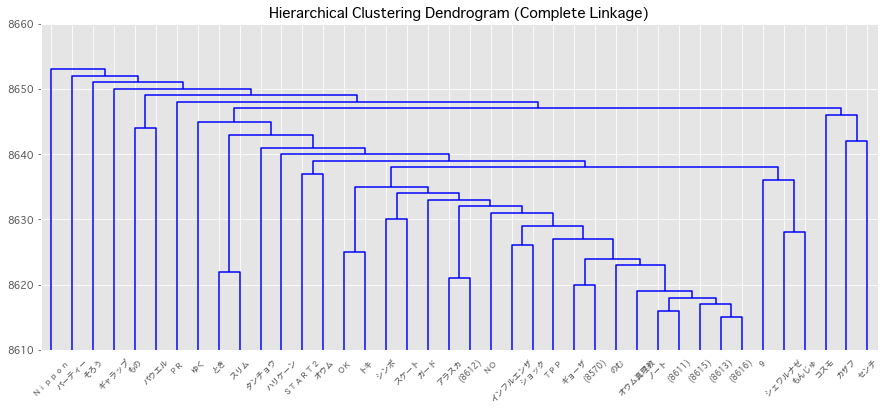

In [41]:
plt.rcParams["font.family"] ="Osaka"
plt.rcParams["figure.figsize"] = (15,6)

model4 = hiclwres_test
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plot_dendrogram(model4, p = 40, truncate_mode = 'lastp', orientation = 'top', labels=freq1000terms[model4.labels_], color_threshold = 991)
plt.ylim(8610,8660)
plt.show()